In [15]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Selection

In [16]:
financial_ratios_table = pd.read_csv('../../DATA/MODEL/training_data_temp.csv')

In [17]:
# def sal_class_function(x):
#     if x is None or x != x or x < 50000: return "<50,000"
#     if x < 100000: return "00,050,000 - 100,000"
#     if x < 500000: return "00,100,000 - 500,000"
#     if x < 1000000: return '00,500,000 - 1,000,000'
#     if x < 3000000: return '01,000,000 - 3,000,000'
#     if x < 15000000: return '03,000,000 - 15,000,000'
#     if x < 30000000: return '15,000,000 - 30,000,000'
#     if x < 150000000: return '30,000,000 - 150,000,000'
#     return '>150,000,000'

def sal_class_function(x):
    if x is None or x != x or x <= 50000: return "0. <50,000"
    if x <= 2000000: return "1. Mikro"
    if x <= 10000000: return "2. Malý"
    if x <= 50000000: return "3. Stredný"
    return "4. Veľký"
    
financial_ratios_table['sal_class'] = financial_ratios_table['SAL'].apply(sal_class_function)

In [18]:
financial_ratios_table.query('sal_class not in ["0. <50,000", "4. Veľký"]', inplace=True)
financial_ratios_table.query('year == 2018')['sal_class'].value_counts()

1. Mikro      83338
2. Malý        7091
3. Stredný     1853
Name: sal_class, dtype: int64

## Outliers

In [19]:

FINANCIAL_RATIOS = [
    'L3', 'L2', 'L1', 'CF_CL', 'CASH_TA', 'SAL_TA', 'TL_SAL',
    'INV_COST', 'INV_SAL', 'CC_SAL', 'TA_SAL',
    'TL_TA', 'CF_TL', 'CL_TA', 'NCL_TA', 'EQ_TL',
    'EQ_TA', 
    'EBIT_INT', 
    'CL_CC', 'ROE', 'EAT_TA',
    'ROA_BRUTTO', 'CF_TA', 'CF_SAL', 'ROS',
    'EAT_YIE', 'ROI', 'ROA_NETTO',
    'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']

PRIMARY_METRICS = [
    'CA',
    'CASH',
    'CL', 'EQ', 'NCL', 'TA', 'TL', 'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL', 'COST',
    'INT', 'YIE', 
]

SKNACE_DIVISIONS =  sorted(list(financial_ratios_table['sknace_division'].unique()))
YEARS = sorted(list(financial_ratios_table['year'].unique()))
SAL_CLASSES =  sorted(list(financial_ratios_table['sal_class'].unique()))
TEMPLATES = list(financial_ratios_table['financial_report_template_id'].unique())

In [20]:
financial_ratios_table_2018 = financial_ratios_table.query('year == 2018')
for sal_class in SAL_CLASSES:
    description_table = financial_ratios_table_2018.query('sal_class == @sal_class')[FINANCIAL_RATIOS].describe().T.sort_values('count')
    sample_size = financial_ratios_table_2018.query('sal_class == @sal_class').shape[0]
    description_table['share'] = description_table['count'] / sample_size
    display(description_table)


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,45928.0,300.749723,11455.066291,-933363.000000,0.393012,4.827405,26.503372,7.734150e+05,0.551105
ROE,70269.0,-0.913256,91.800483,-18830.666667,0.018728,0.159719,0.399495,3.539782e+03,0.843181
CL_CC,80491.0,41.965612,1619.315653,-336206.000000,0.759284,1.635556,4.585005,1.063148e+05,0.965838
L3,82647.0,21.989123,3323.662080,-97.313825,0.841997,1.495925,3.529792,9.357865e+05,0.991708
L2,82647.0,10.049214,547.903653,-1114.500000,0.580898,1.257255,3.086636,1.264815e+05,0.991708
L1,82647.0,4.924803,181.019416,-1249.750000,0.111303,0.481785,1.636618,3.445350e+04,0.991708
CF_CL,82647.0,-0.622765,747.410002,-213717.000000,0.048341,0.285265,1.098861,1.419411e+04,0.991708
CF_TL,82819.0,-1.547669,742.942482,-213717.000000,0.035423,0.182337,0.612683,2.005103e+03,0.993772
EQ_TL,82819.0,6.181606,252.987007,-334.530259,0.087585,0.471860,1.779760,6.631111e+04,0.993772
ROA_NETTO,83244.0,-0.585409,83.374080,-21017.500000,-0.004315,0.037480,0.142463,4.765057e+02,0.998872


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,5819.0,2026.348197,33456.469403,-1.088903e+06,2.067883,9.469326,50.188292,1.271865e+06,0.820618
ROE,6619.0,-0.088178,11.668694,-6.753526e+02,0.036965,0.155879,0.377401,2.386519e+02,0.933437
CL_CC,7061.0,7.653429,116.491381,-6.350922e+00,0.712477,1.143148,2.179693,6.433080e+03,0.995769
L3,7083.0,5.315561,98.621046,-3.830577e+01,1.021006,1.486018,2.608044,6.147168e+03,0.998872
L2,7083.0,4.369024,92.524399,-1.231560e+00,0.714387,1.152283,2.031796,6.147168e+03,0.998872
L1,7083.0,1.626202,65.884584,-7.077893e+02,0.034861,0.165360,0.578745,5.453275e+03,0.998872
CF_CL,7083.0,0.652331,40.697365,-1.731102e+03,0.094790,0.286704,0.746012,2.394091e+03,0.998872
CF_TL,7087.0,0.253289,17.552641,-9.759864e+02,0.061908,0.170349,0.404951,4.251450e+02,0.999436
EQ_TL,7087.0,2.235207,31.312197,-1.122990e+00,0.148126,0.445510,1.217960,1.910848e+03,0.999436
ROA_NETTO,7090.0,0.000410,4.602705,-3.854521e+02,0.005462,0.039196,0.106403,2.351939e+01,0.999859


,count,mean,std,min,25%,50%,75%,max,share
EBIT_INT,1686.0,8360.433832,152221.134589,-322361.416667,1.977745,9.913733,58.388833,5.706905e+06,0.909876
ROE,1767.0,0.088135,1.692431,-45.324116,0.030032,0.124172,0.303116,2.215195e+01,0.953589
CL_CC,1850.0,4.980972,55.101278,0.001699,0.676175,1.045828,1.914213,1.389690e+03,0.998381
EQ_TL,1852.0,1.222013,2.754841,-0.962481,0.183326,0.475782,1.191640,5.142658e+01,0.999460
CF_TL,1852.0,0.037206,9.303954,-346.658217,0.055504,0.153765,0.350993,2.333058e+01,0.999460
INV_COST,1852.0,31.082647,44.481728,-2.592996,1.178644,16.113233,46.103089,5.910841e+02,0.999460
L3,1852.0,2.843960,14.268176,0.030894,1.097202,1.622566,2.625870,5.911571e+02,0.999460
CF_CL,1852.0,0.052970,19.004236,-786.859127,0.088072,0.270625,0.658258,4.714510e+01,0.999460
L1,1852.0,0.523287,1.803127,-0.696223,0.015843,0.101810,0.416072,4.305292e+01,0.999460
L2,1852.0,2.256108,14.220199,0.025856,0.713511,1.203161,1.939137,5.911571e+02,0.999460


In [21]:
FINANCIAL_RATIOS.remove('EBIT_INT')

In [22]:
from sklearn.impute import SimpleImputer


def fill_missing_values_mean(data):
    # Instantiate SimpleImputer with mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the data and transform the data
    imputed_data = imputer.fit_transform(data)

    return imputed_data


In [23]:
import sys

def mahalanobis_distance(data):
    """
    Calculate Mahalanobis Distance for each data point in a multivariate dataset.
    
    Parameters:
        data (DataFrame): Input DataFrame containing numerical columns.
        
    Returns:
        distances (Series): Mahalanobis Distance for each data point.
    """

    data = data.drop(columns = ['L2'])

    normalized_data = pd.DataFrame(fill_missing_values_mean(data), columns=data.columns, index=data.index)
    # Normalize the data
    # normalized_data = (imputed_data - imputed_data.mean()) / imputed_data.std()

    # Calculate mean vector
    mean_vector = normalized_data.mean()

    # Calculate covariance matrix
    covariance_matrix = normalized_data.cov()

    # Check if covariance matrix is singular
    if np.linalg.cond(covariance_matrix) > 1/sys.float_info.epsilon:
        # Covariance matrix is singular, apply regularization
        regularization = 1e-6  # Adjust regularization parameter as needed
        covariance_matrix += regularization * np.eye(len(data.columns))

    # Calculate inverse covariance matrix
    try:
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)

        # Calculate Mahalanobis Distance for each data point
        distances = []
        for index, row in normalized_data.iterrows():
            diff = row - mean_vector
            distance = np.sqrt(np.abs(diff.dot(inv_covariance_matrix).dot(diff)))
            distances.append(distance)

        return pd.Series(distances, index=data.index)
    
    except np.linalg.LinAlgError:
        display(data.shape)
        display(data)
        display(normalized_data)

def flag_outliers_mahalanobis(data, threshold=3):
    """
    Flag outliers in a DataFrame using Mahalanobis Distance method.
    
    Parameters:
        data (DataFrame): Input DataFrame containing numerical columns.
        threshold (float): Threshold for identifying outliers based on Mahalanobis Distance.
        
    Returns:
        outliers (Series): Boolean Series indicating whether each data point is an outlier.
    """
    # Calculate Mahalanobis Distance for each data point
    distances = mahalanobis_distance(data)

    # Determine threshold based on chi-square distribution
    chi2_threshold = threshold ** 2
    try:
        cutoff = np.percentile(distances, 100 * (1 - np.exp(-chi2_threshold / 2)))

        # Flag outliers
        outliers = distances > cutoff

        return outliers
    except TypeError:
        print(chi2_threshold)
        print(threshold)
        display(distances)
        display(data)



# outlier_boolean_0 = pd.DataFrame()
# for year in YEARS:
#     for sknace_division in SKNACE_DIVISIONS:
#         for sal_class in SAL_CLASSES:
#             subset = financial_ratios_table.query('sal_class == @sal_class and sknace_division == @sknace_division and year == @year').set_index(['entity_ico', 'year'])[FINANCIAL_RATIOS]
#             if subset.shape[0] < 2:
#                 outlier_boolean_0 = pd.concat([
#                     outlier_boolean_0,
#                     subset.reset_index()[['entity_ico', 'year']]
#                 ], axis=0)
#                 continue
#             outlier_boolean_0 = pd.concat([
#                 outlier_boolean_0,
#                 flag_outliers_mahalanobis(subset).to_frame(name = 'is_outlier_0').reset_index()
#             ], axis=0)
            

# display(outlier_boolean_0['is_outlier_0'].value_counts())

outlier_boolean_1 = pd.DataFrame()
for year in YEARS:
    for sal_class in SAL_CLASSES:
        subset = financial_ratios_table.query('sal_class == @sal_class and year == @year').set_index(['entity_ico', 'year'])[FINANCIAL_RATIOS]
        if subset.shape[0] < 2:
            outlier_boolean_1 = pd.concat([
                outlier_boolean_1,
                subset.reset_index()[['entity_ico', 'year']]
            ], axis=0)
            continue
        outlier_boolean_1 = pd.concat([
            outlier_boolean_1,
            flag_outliers_mahalanobis(subset).to_frame(name = 'is_outlier').reset_index()
        ], axis=0)
        
display(outlier_boolean_1['is_outlier'].value_counts())

# outlier_boolean_2 = pd.DataFrame()
# for year in YEARS:
#     for sknace_division in SKNACE_DIVISIONS:
#         subset = financial_ratios_table.query('sknace_division == @sknace_division and year == @year').set_index(['entity_ico', 'year'])[FINANCIAL_RATIOS]
#         if subset.shape[0] < 2:
#             outlier_boolean_2 = pd.concat([
#                 outlier_boolean_2,
#                 subset.reset_index()[['entity_ico', 'year']]
#             ], axis=0)
#             continue
#         outlier_boolean_2 = pd.concat([
#             outlier_boolean_2,
#             flag_outliers_mahalanobis(subset).to_frame(name = 'is_outlier_2').reset_index()
#         ], axis=0)


# display(outlier_boolean_2['is_outlier_2'].value_counts())


False    697259
True       7843
Name: is_outlier, dtype: int64

In [24]:
display(financial_ratios_table.shape)

# financial_ratios_table = financial_ratios_table.merge(outlier_boolean_0, on = ['entity_ico', 'year'], how = 'left')
financial_ratios_table = financial_ratios_table.merge(outlier_boolean_1, on = ['entity_ico', 'year'], how = 'left')
# financial_ratios_table = financial_ratios_table.merge(outlier_boolean_2, on = ['entity_ico', 'year'], how = 'left')

display(financial_ratios_table.shape)
display(financial_ratios_table)

(705102, 178)

(705102, 179)

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,financial_report_template_id,entity_name,establishment_date,sknace_code,entity_state,financial_report_id.1,financial_report_template_id.1,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,short_term_trade_liabilities,liabilities_to_employees_and_social_insurance,...,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,SOCLIAB_SAL,DPHZ_vat_registration_cancelled_x,DPHZ_vat_registration_cancelled_1y_off_x,DPHZ_vat_registration_cancelled_2y_off_x,RO_cancelled,RO_cancelled_1y_off,RO_cancelled_2y_off,RUZ_cancelled_x,RUZ_cancelled_1y_off_x,RUZ_cancelled_2y_off_x,RUZ_established,RUZ_established_1y_off,RUZ_established_2y_off,RU_konkurz_x,RU_konkurz_1y_off_x,RU_konkurz_2y_off_x,RU_ostatne_konania_x,RU_ostatne_konania_1y_off_x,RU_ostatne_konania_2y_off_x,RUZ_indirect_criterion_x,RUZ_indirect_criterion_1y_off_x,RUZ_indirect_criterion_2y_off_x,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled_y,DPHZ_vat_registration_cancelled_1y_off_y,DPHZ_vat_registration_cancelled_2y_off_y,RUZ_cancelled_y,RUZ_cancelled_1y_off_y,RUZ_cancelled_2y_off_y,RUZ_indirect_criterion_y,RUZ_indirect_criterion_1y_off_y,RUZ_indirect_criterion_2y_off_y,RU_konkurz_y,RU_konkurz_1y_off_y,RU_konkurz_2y_off_y,RU_ostatne_konania_y,RU_ostatne_konania_1y_off_y,RU_ostatne_konania_2y_off_y,sal_class,is_outlier
0,4593745,2340588,1,16410,2015-06-11,698.0,2014,1,699.0,"TECHNOPOL, a.s.",1970-02-18,70220.0,NaN,4593745,699.0,21085611.0,19528311.0,3680.0,21922.0,0.0,3254.0,18668.0,0.0,19502709.0,0.0,1543495.0,352.0,0.0,1227526.0,2900.0,0.0,315617.0,0.0,315617.0,21085611.0,17186564.0,166000.0,166000.0,0.0,13687667.0,3608126.0,3608126.0,-275229.0,3899047.0,65289.0,0.0,0.0,3796505.0,55151.0,10861.0,...,-0.013006,-0.011659,-0.869190,-0.973098,-0.816640,-0.010615,-0.013053,0.688878,0.038400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,Vedenie firiem; poradenstvo v oblasti riadenia,M,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1. Mikro,True
1,5107771,2744582,2,16410,2016-05-23,698.0,2015,1,699.0,"TECHNOPOL, a.s.",1970-02-18,70220.0,NaN,5107771,699.0,21924517.0,19315150.0,9603.0,5379.0,0.0,3052.0,2327.0,0.0,19300168.0,0.0,2600439.0,166.0,0.0,2018671.0,1433.0,0.0,581602.0,0.0,581602.0,21924517.0,16793364.0,166000.0,166000.0,0.0,15288565.0,1368126.0,1368126.0,-29327.0,5131153.0,5075794.0,0.0,0.0,43344.0,3154.0,20292.0,...,-0.001292,-0.000302,-0.023388,-0.103749,-0.086507,0.001142,-0.001338,0.820198,0.071786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Vedenie firiem; poradenstvo v oblasti riadenia,M,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1. Mikro,False
2,5623456,3158922,2,16410,2017-05-18,698.0,2016,1,699.0,"TECHNOPOL, a.s.",1970-02-18,70220.0,NaN,5623456,699.0,20214015.0,17519637.0,4719.0,2010.0,0.0,2010.0,0.0,0.0,17512908.0,0.0,2686285.0,122.0,0.0,2045962.0,924.0,0.0,640201.0,0.0,640201.0,20214015.0,15620952.0,166000.0,166000.0,0.0,134

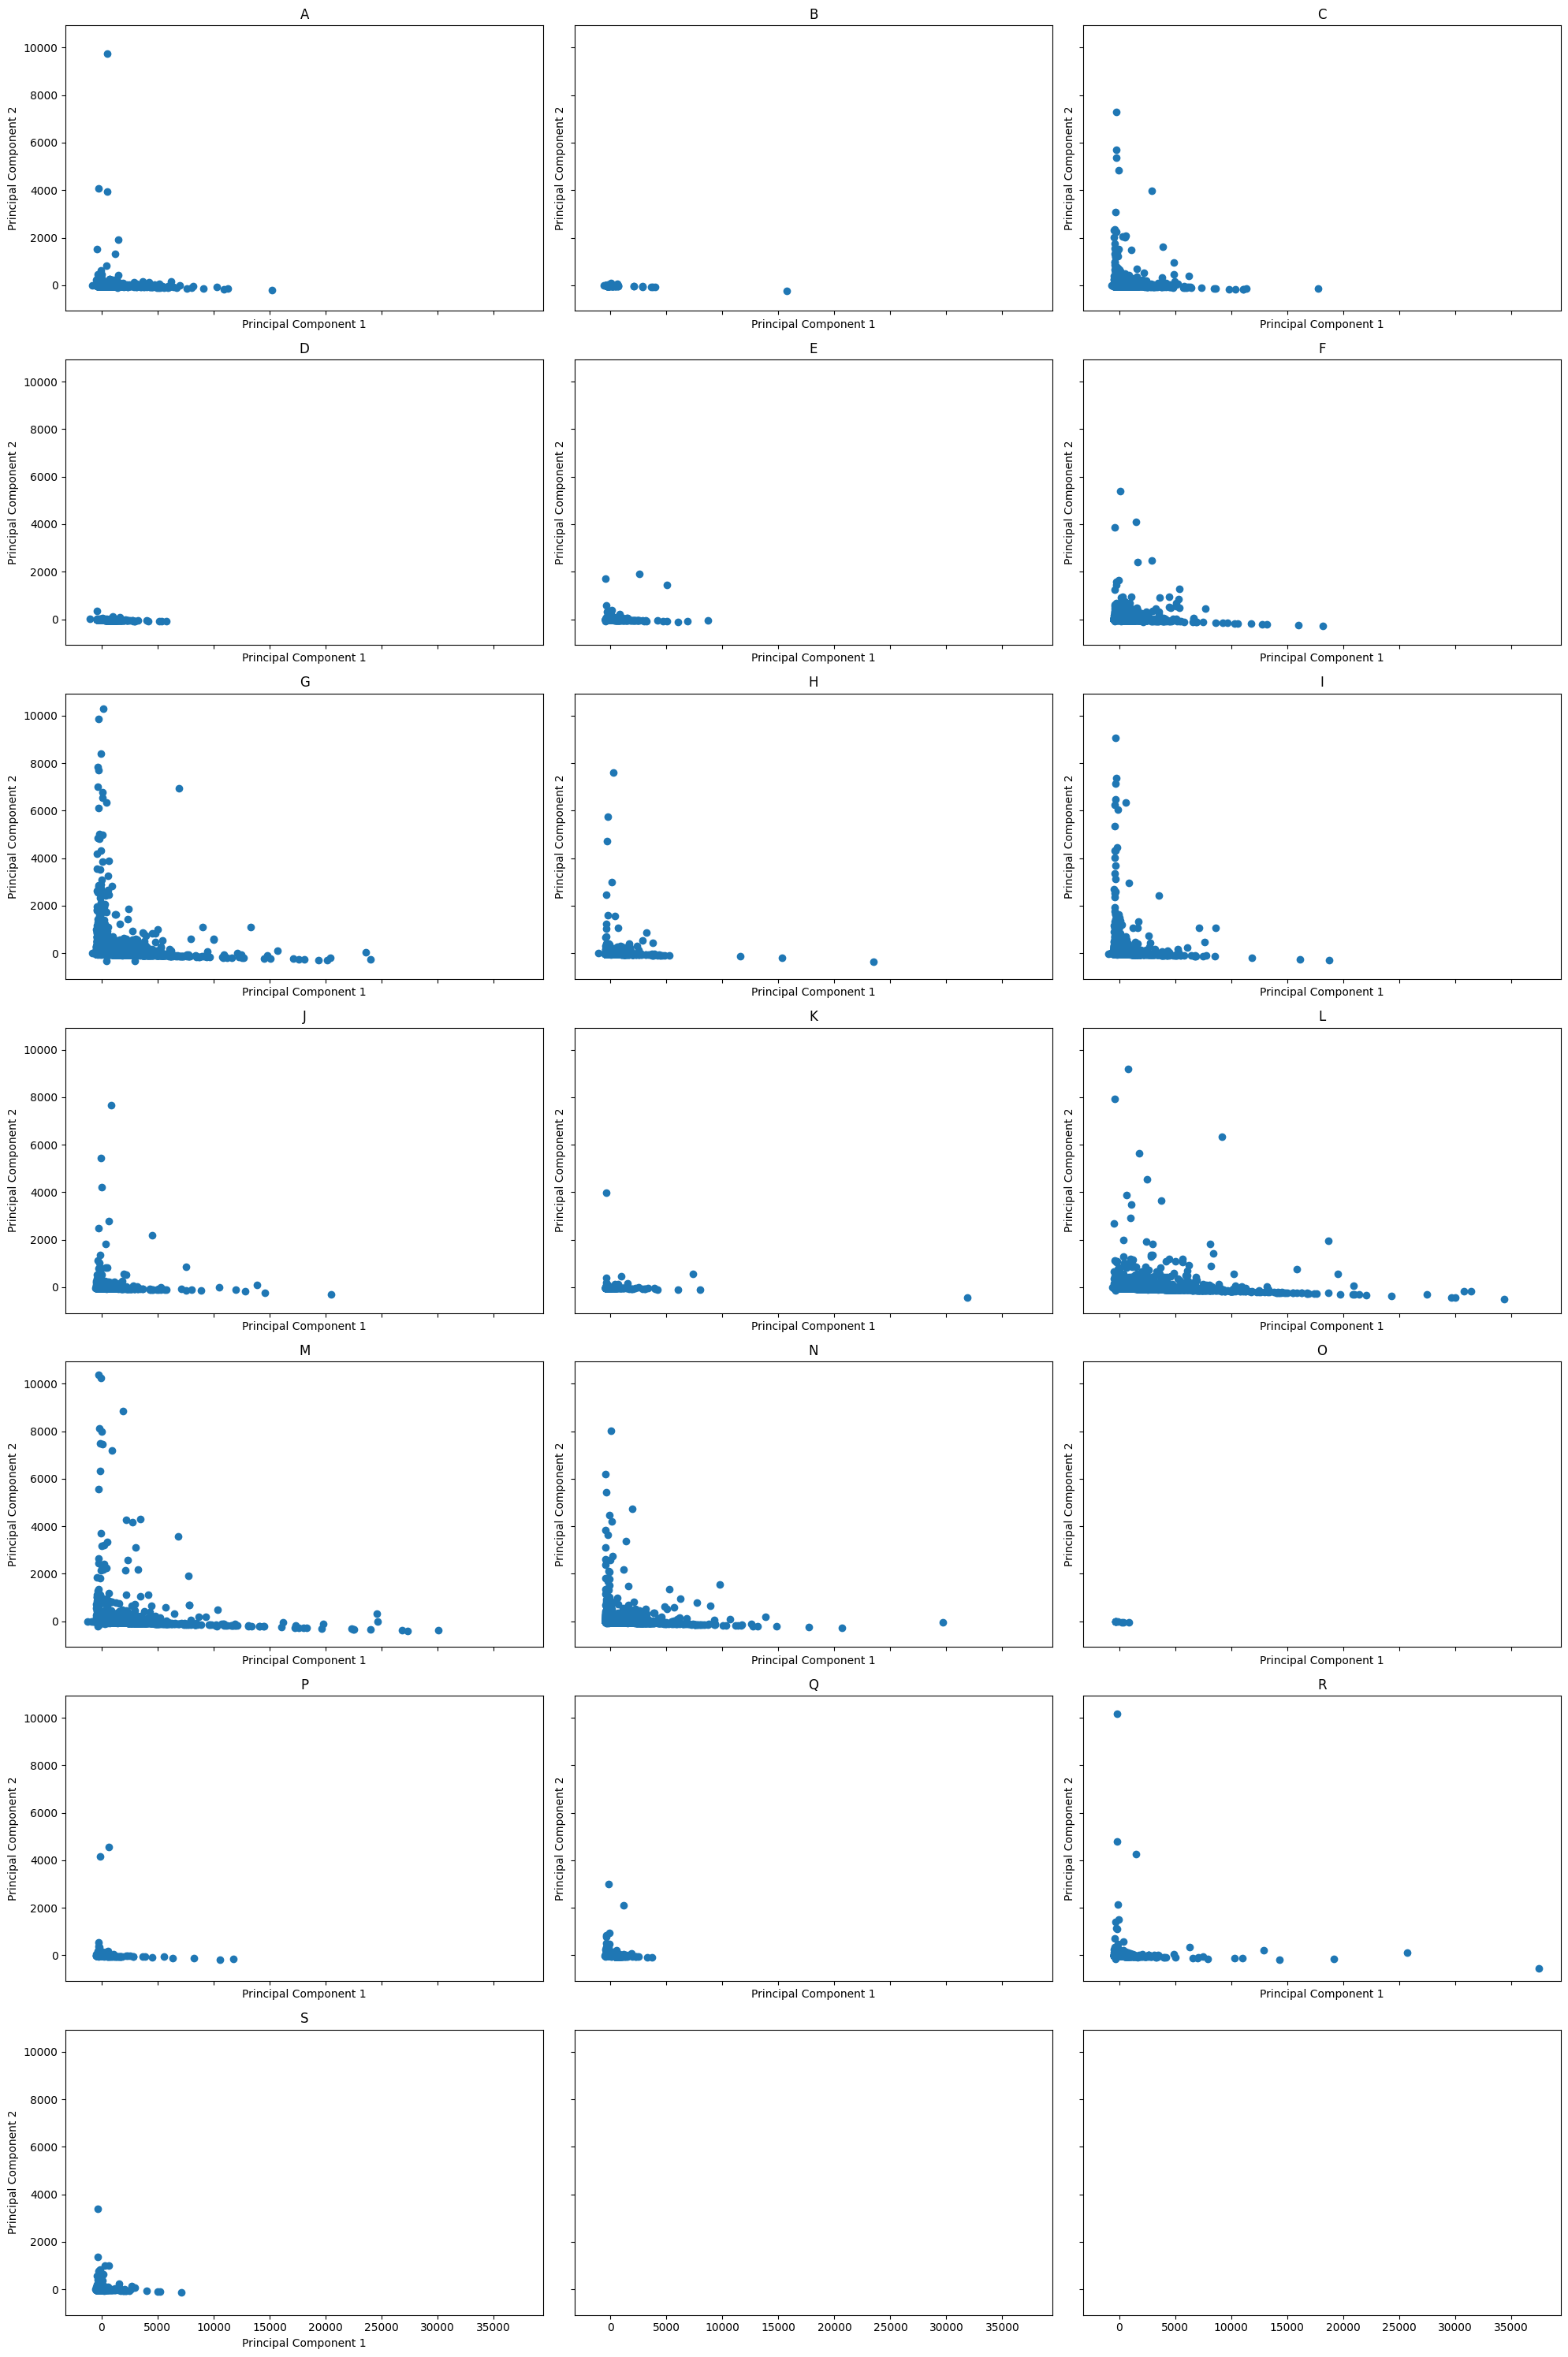

In [25]:
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt


fig, axes = plt.subplots(ncols=3, nrows=len(SKNACE_DIVISIONS) // 3 + 1, sharex=True, sharey=True, figsize=(20, 30))
axes = axes.flatten()

data_group = financial_ratios_table.query('year == 2018 and is_outlier == False')

data = fill_missing_values_mean(data_group[FINANCIAL_RATIOS].values)
            
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)


for i, sknace in enumerate(SKNACE_DIVISIONS):
    ax = axes[i]
    class_indices = data_group['sknace_division'] == sknace
    
    ax.scatter(pca_data[class_indices, 0], pca_data[class_indices, 1], label=sknace)

    ax.set_title(f'{sknace}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

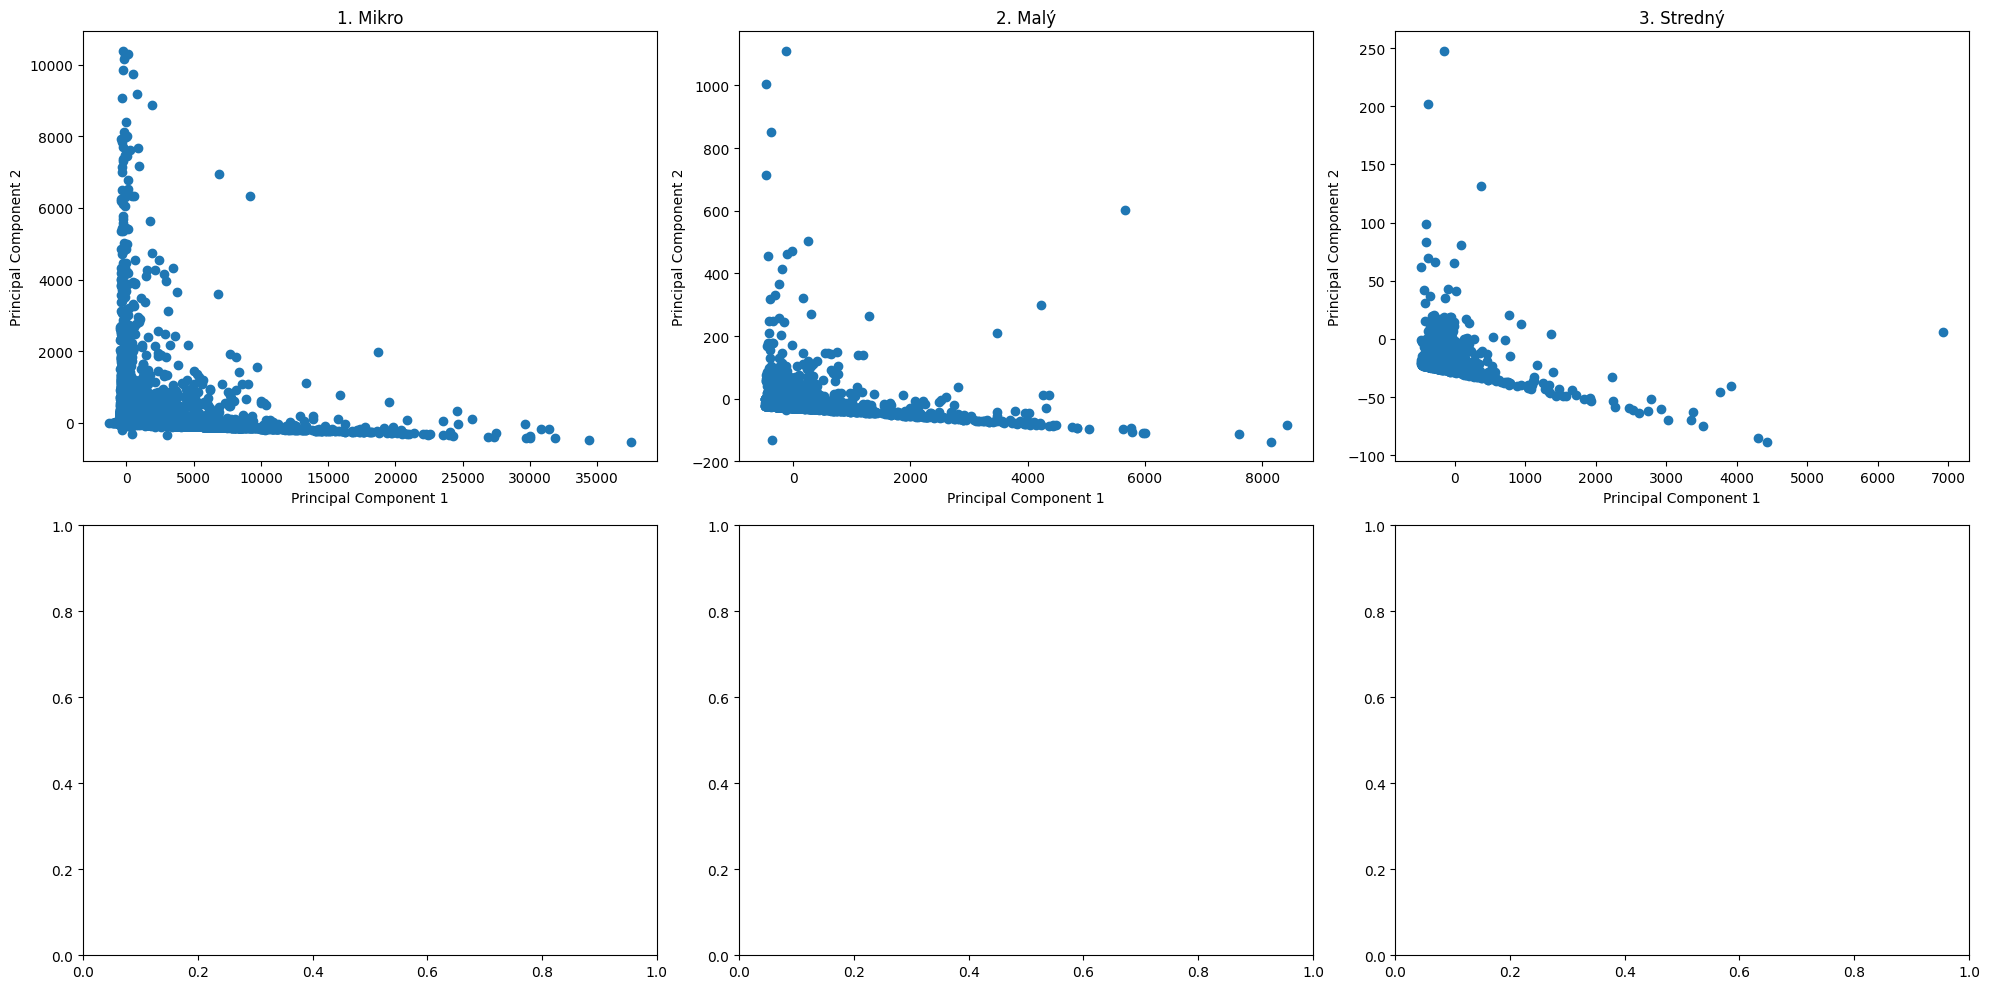

In [26]:
fig, axes = plt.subplots(ncols=3, nrows=len(SAL_CLASSES) // 3 + 1, figsize=(20, 10))
axes = axes.flatten()

data_group = financial_ratios_table.query('year == 2018 and is_outlier == False')

data = fill_missing_values_mean(data_group[FINANCIAL_RATIOS].values)
            
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)


for i, sal_class in enumerate(SAL_CLASSES):
    ax = axes[i]
    class_indices = data_group['sal_class'] == sal_class
    
    ax.scatter(pca_data[class_indices, 0], pca_data[class_indices, 1], label=sknace)

    ax.set_title(f'{sal_class}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [27]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns

# def get_outliers(l):
#     q1 = l.quantile(0.25)  
#     q3 = l.quantile(0.75)
#     iqr = q3-q1
#     fenceLow = q1 - 1.5 * iqr
#     fenceHigh = q3 + 1.5 * iqr

#     return [(i<fenceLow or i>fenceHigh) for i in l]


# # def get_outliers(l, z_threshold=0.5):
# #     mean = np.mean(l)
# #     std_dev = np.std(l)
# #     z_scores = [(i - mean) / std_dev for i in l]
# #     return [abs(z) > z_threshold for z in z_scores]


# def plot_histograms(df, columns):
#     # Plotting the histograms
#     fig, axes = plt.subplots(nrows=int(len(columns) / 3) + 1, ncols=3, figsize=(20, 30))
#     axes = axes.flatten()

#     for i, column in enumerate(columns):
#         print(f'column {column}')
#         ax = axes[i]

#         data = df[column]
        
#         Q1 = data.quantile(0.1)
#         Q3 = data.quantile(0.9)
        
#         IQR = Q3 - Q1
        
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         cleaned_data = data[~((data < lower_bound) | (data > upper_bound))]

#         bin_width = 2 * IQR / (len(data) ** (1/3))

#         if bin_width > 0:                
#             num_bins = int(np.ceil((np.max(data) - np.min(data)) / bin_width))
#             sns.histplot(data, bins=num_bins, kde=True, color='skyblue', edgecolor='black', ax=ax)
#         else:
#             sns.histplot(data, kde=True, color='skyblue', edgecolor='black', ax=ax)
#         # sns.histplot(data, kde=True, color='skyblue', edgecolor='black', ax=ax)
#         # ax.hist(data, color='skyblue', edgecolor='black', kde=True)
#         # sns.histplot(data, kde=True, color='skyblue', edgecolor='black', ax=ax)

#         ax.set_title(column)
#         ax.set_xlabel('Value')
#         ax.set_ylabel('Frequency')
#         # ax.set_yscale('log')

        

#     plt.tight_layout()
#     plt.show()


In [28]:
# outlier_boolean = pd.DataFrame()

# for year in YEARS:
#     print(year)
#     for sal_class in SAL_CLASSES:
#         for sknace in SKNACE_DIVISIONS:
#             for template_id in TEMPLATES:
#                 subset = financial_ratios_table.query('financial_report_template_id == @template_id and year == @year and sknace_division == @sknace and SAL_CLASS == @sal_class')[['financial_statement_id'] + PRIMARY_METRICS].set_index(['financial_statement_id'])
#                 if subset.shape[0] <= 2:
#                     continue
#                 outliers = subset.apply(get_outliers)

#                 print('size', subset.shape[0])
#                 print('not outliers', round(subset[~outliers.apply(lambda x:any(x), axis=1)].shape[0]/subset.shape[0], 2))
#                 print('outliers', round(subset[outliers.apply(lambda x:any(x), axis=1)].shape[0]/subset.shape[0], 2))

#                 if subset[~outliers.apply(lambda x:any(x), axis=1)].shape[0] != 0 and subset[outliers.apply(lambda x:any(x), axis=1)].shape[0] != 0:
#                     display(outliers.apply(lambda x: x.value_counts(normalize=True)).T.sort_values(True, ascending = False))

#                 non_outliers_index = subset[~outliers.apply(lambda x:any(x), axis=1)].index
#                 outliers_index = subset[outliers.apply(lambda x:any(x), axis=1)].index

#                 subset_non_outliers = pd.DataFrame([0 for _ in range(len(non_outliers_index))], index = non_outliers_index, columns = ['is_outlier'])
#                 subset_outliers = pd.DataFrame([1 for _ in range(len(outliers_index))], index = outliers_index, columns = ['is_outlier'])


#                 outlier_boolean = pd.concat([outlier_boolean, subset_non_outliers, subset_outliers], axis = 0)

   

In [29]:
financial_ratios_table

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,financial_report_template_id,entity_name,establishment_date,sknace_code,entity_state,financial_report_id.1,financial_report_template_id.1,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,short_term_trade_liabilities,liabilities_to_employees_and_social_insurance,...,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,SOCLIAB_SAL,DPHZ_vat_registration_cancelled_x,DPHZ_vat_registration_cancelled_1y_off_x,DPHZ_vat_registration_cancelled_2y_off_x,RO_cancelled,RO_cancelled_1y_off,RO_cancelled_2y_off,RUZ_cancelled_x,RUZ_cancelled_1y_off_x,RUZ_cancelled_2y_off_x,RUZ_established,RUZ_established_1y_off,RUZ_established_2y_off,RU_konkurz_x,RU_konkurz_1y_off_x,RU_konkurz_2y_off_x,RU_ostatne_konania_x,RU_ostatne_konania_1y_off_x,RU_ostatne_konania_2y_off_x,RUZ_indirect_criterion_x,RUZ_indirect_criterion_1y_off_x,RUZ_indirect_criterion_2y_off_x,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled_y,DPHZ_vat_registration_cancelled_1y_off_y,DPHZ_vat_registration_cancelled_2y_off_y,RUZ_cancelled_y,RUZ_cancelled_1y_off_y,RUZ_cancelled_2y_off_y,RUZ_indirect_criterion_y,RUZ_indirect_criterion_1y_off_y,RUZ_indirect_criterion_2y_off_y,RU_konkurz_y,RU_konkurz_1y_off_y,RU_konkurz_2y_off_y,RU_ostatne_konania_y,RU_ostatne_konania_1y_off_y,RU_ostatne_konania_2y_off_y,sal_class,is_outlier
0,4593745,2340588,1,16410,2015-06-11,698.0,2014,1,699.0,"TECHNOPOL, a.s.",1970-02-18,70220.0,NaN,4593745,699.0,21085611.0,19528311.0,3680.0,21922.0,0.0,3254.0,18668.0,0.0,19502709.0,0.0,1543495.0,352.0,0.0,1227526.0,2900.0,0.0,315617.0,0.0,315617.0,21085611.0,17186564.0,166000.0,166000.0,0.0,13687667.0,3608126.0,3608126.0,-275229.0,3899047.0,65289.0,0.0,0.0,3796505.0,55151.0,10861.0,...,-0.013006,-0.011659,-0.869190,-0.973098,-0.816640,-0.010615,-0.013053,0.688878,0.038400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,Vedenie firiem; poradenstvo v oblasti riadenia,M,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1. Mikro,True
1,5107771,2744582,2,16410,2016-05-23,698.0,2015,1,699.0,"TECHNOPOL, a.s.",1970-02-18,70220.0,NaN,5107771,699.0,21924517.0,19315150.0,9603.0,5379.0,0.0,3052.0,2327.0,0.0,19300168.0,0.0,2600439.0,166.0,0.0,2018671.0,1433.0,0.0,581602.0,0.0,581602.0,21924517.0,16793364.0,166000.0,166000.0,0.0,15288565.0,1368126.0,1368126.0,-29327.0,5131153.0,5075794.0,0.0,0.0,43344.0,3154.0,20292.0,...,-0.001292,-0.000302,-0.023388,-0.103749,-0.086507,0.001142,-0.001338,0.820198,0.071786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,Vedenie firiem; poradenstvo v oblasti riadenia,M,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1. Mikro,False
2,5623456,3158922,2,16410,2017-05-18,698.0,2016,1,699.0,"TECHNOPOL, a.s.",1970-02-18,70220.0,NaN,5623456,699.0,20214015.0,17519637.0,4719.0,2010.0,0.0,2010.0,0.0,0.0,17512908.0,0.0,2686285.0,122.0,0.0,2045962.0,924.0,0.0,640201.0,0.0,640201.0,20214015.0,15620952.0,166000.0,166000.0,0.0,134

In [30]:
financial_ratios_table.to_csv('../../DATA/FINAL/training_data.csv', index = False)